## Logistic Regression

In [1]:
#importar librerias

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd # analysis of tabular data
from sklearn.model_selection import train_test_split






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargamos nuestros datos
dataset11=pd.read_csv('/content/drive/MyDrive/Notebooks/Machine Learning/Trabajo supervised/dataset11.csv', delimiter=',')
#Ver parte de los datos
dataset11.head(10)

#Vemos si existe algún valor incompleto
dataset11.isna().sum().sort_values()

#eliminamos las columnas que no son atributos
x1 = dataset11.drop('Target', axis = 'columns')
x2 = x1.drop('Pacient', axis = 'columns')

#separamos los datos en train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(
                                        x2,
                                        dataset11['Target'],
                                        test_size= 0.2,
                                        random_state = 125,
                                    )


In [ ]:
#importar tiempo para medir el tiempo de ejecución
import time

start = time.time()

#Seleccionamos un rango de valores para C, que es la inversa de regularización y para el número máximo de iteraciones
C_range = np.arange (0.1, 15, 0.1)
max_range = list(range(100, 500, 100))
param_grid = {'C': C_range, 'max_iter':max_range}

#Usamos GridSearch para obtener los mejores parámetros, aquellos que nos den una accuracy más alta
log = LogisticRegression()
grid_search = GridSearchCV(log, param_grid, cv=10, scoring='accuracy')
grid_search.fit(Xtrain,ytrain)

#guardamos los mejores parámetros
C = grid_search.best_params_['C']
max_i = grid_search.best_params_['max_iter']

#Entrenamos el modelo con los mejores parámetros
log = LogisticRegression(C = C, max_iter = max_i)
log.fit(Xtrain, ytrain)


#Tiempo de ejecución
print("\n--- %s seconds ---" % (time.time() - start))

#Usamos aquellos valores predecidos que son diferentes del valor real del test para calcular el error 
yhatTest = log.predict(Xtest)
print('For a C: ' + str(C) + ' For a max_iter: ' + str(max_i) + ' Test Error:' + str(np.mean(yhatTest != ytest)))

#Confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhatTest))
print(classification_report(ytest,yhatTest))




--- 112.32713413238525 seconds ---
For a C: 14.1 For a max_iter: 100 Test Error:0.18181818181818182
----------------Test Confusion Matrix------------------
[[2 0]
 [2 7]]
              precision    recall  f1-score   support

          NR       0.50      1.00      0.67         2
           R       1.00      0.78      0.88         9

    accuracy                           0.82        11
   macro avg       0.75      0.89      0.77        11
weighted avg       0.91      0.82      0.84        11



## Decision Tree

In [ ]:
#Importar librerias
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#separamos los datos en train y test
x1 = dataset11.drop('Target', axis = 'columns')
x2 = x1.drop('Pacient', axis = 'columns')
Xtrain, Xtest, ytrain, ytest = train_test_split(
                                        x2,
                                        dataset11['Target'],
                                        test_size= 0.1,
                                        random_state = 125,
                                    )

In [ ]:
start = time.time()

#Defininimos los parámetros del arbol de decisión para encontrar el mejor por cross-validation
#min_samples_leaf es el número mínimo de muestras para generar un nodo hoja
#min_samples_split es el número mínimo de muestras para dividir un nodo interno
#max_depth se relaciona con la longitud del árbol, el máximo número de ramas
param_grid = {'min_samples_leaf': np.arange(2, 15),
              'min_samples_split': np.arange(2, 15),
              'max_depth':np.arange(1, 50),
              'criterion':['entropy','gini'],
              }


# Creamos un gridsearch con cross-validation de valor 10
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

# Entrenamos el clasificador con los datos de entrenamiento
clf.fit(Xtrain , ytrain)

# Obtenemos los mejores parámetros
print("Best estimator found by grid search:")
print(clf.best_estimator_)
model = clf.best_estimator_

print("\n--- %s seconds ---" % (time.time() - start))

# Predicciones 
yhattrain = model.predict(Xtrain)
yhattest = model.predict(Xtest)


#Train confusion matrix
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(ytrain,yhattrain))
print(classification_report(ytrain,yhattrain))

#Test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhattest))
print(classification_report(ytest,yhattest))



Best estimator found by grid search:
DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=6)

--- 770.3080129623413 seconds ---
----------------Train Confusion Matrix------------------
[[20  2]
 [ 6 19]]
              precision    recall  f1-score   support

          NR       0.77      0.91      0.83        22
           R       0.90      0.76      0.83        25

    accuracy                           0.83        47
   macro avg       0.84      0.83      0.83        47
weighted avg       0.84      0.83      0.83        47

----------------Test Confusion Matrix------------------
[[1 0]
 [1 4]]
              precision    recall  f1-score   support

          NR       0.50      1.00      0.67         1
           R       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



In [ ]:
#visualización del árbol con texto
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
               )
print(texto_modelo)

|--- feature_0 <= 0.50
|   |--- feature_9 <= 1.50
|   |   |--- class: R
|   |--- feature_9 >  1.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- class: R
|   |   |--- feature_12 >  0.50
|   |   |   |--- class: NR
|--- feature_0 >  0.50
|   |--- feature_3 <= 1.50
|   |   |--- feature_18 <= 0.50
|   |   |   |--- class: R
|   |   |--- feature_18 >  0.50
|   |   |   |--- class: NR
|   |--- feature_3 >  1.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- class: NR
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: NR



Profundidad del árbol: 3
Número de nodos terminales: 7


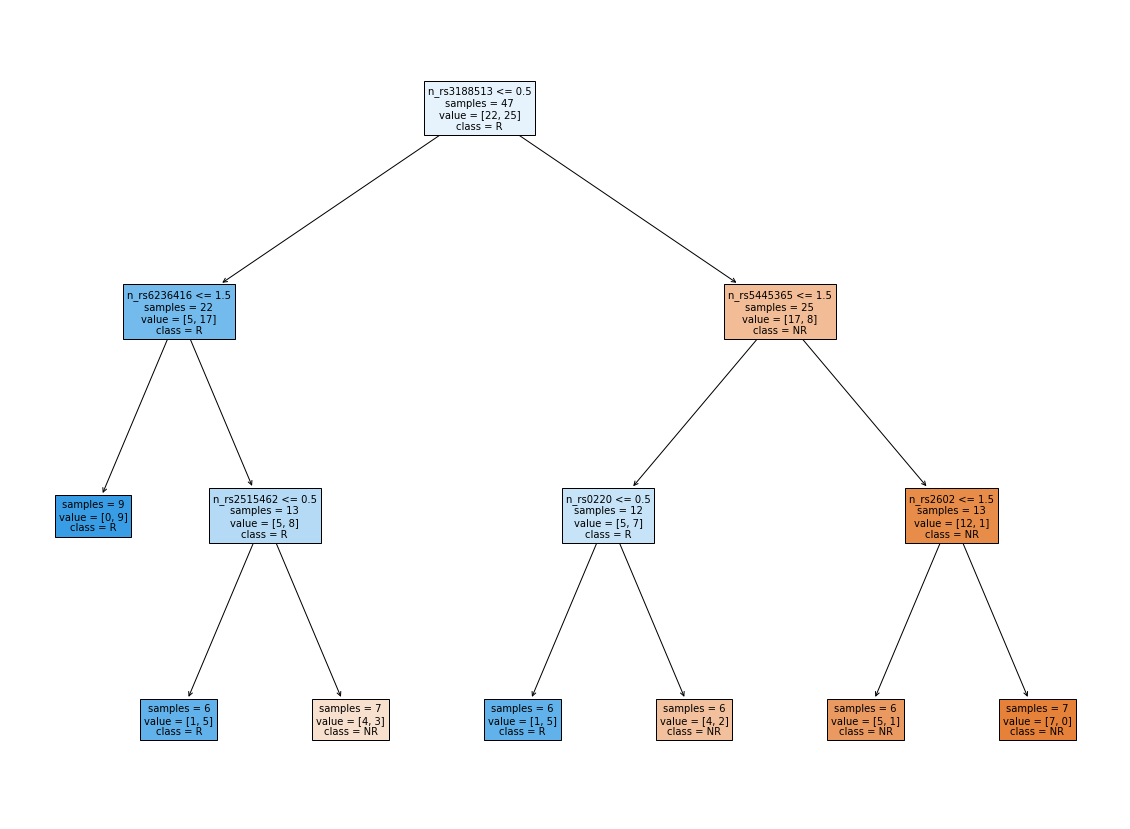

In [ ]:
#Visualizacion del árbol usando plot_tree object

from sklearn.tree import plot_tree
x = x2.columns.values

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = x,
            class_names   = ['NR', 'R'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

## K-Nearest Neighbors

In [ ]:
#Importar librerias
from sklearn import neighbors

In [ ]:
#separamos los datos en train y test
x1 = dataset11.drop('Target', axis = 'columns')
x2 = x1.drop('Pacient', axis = 'columns')
Xtrain, Xtest, ytrain, ytest = train_test_split(
                                        x2,
                                        dataset11['Target'],
                                        test_size= 0.1,
                                        random_state = 125,
                                    )

In [ ]:

#Iniciamos el tiempo
start = time.time()

#Obtenemos una lista de valores para el número de neighbors 
k_range = list(range(1, 11))

#Además de el número de vecino porbaremos distintas métricas una de distancia y otra de similaridad
param_grid = {'n_neighbors': k_range, 'metric':[ 'manhattan', 'cosine']}
  
knn = neighbors.KNeighborsClassifier()

#Buscamos los mejores parámetros con cross-validation de 10 
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_search.fit(Xtrain, ytrain)

k = grid_search.best_params_['n_neighbors']
m = grid_search.best_params_['metric']
knn = neighbors.KNeighborsClassifier (n_neighbors = k, metric= m)
knn.fit(Xtrain , ytrain)

print("\n--- %s seconds ---" % (time.time() - start))

print("Best estimator found by grid search:")
print(grid_search.best_estimator_)

yhatTest = knn.predict(Xtest)
print('For a K:' + str(k) + ' Test Error:' + str(np.mean(yhatTest != ytest)))

#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhatTest))
print(classification_report(ytest,yhatTest))



--- 1.0861694812774658 seconds ---
Best estimator found by grid search:
KNeighborsClassifier(metric='manhattan')
For a K:5 Test Error:0.16666666666666666
----------------Test Confusion Matrix------------------
[[1 0]
 [1 4]]
              precision    recall  f1-score   support

          NR       0.50      1.00      0.67         1
           R       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x1 = dataset11.drop('Target', axis = 'columns')
x2 = x1.drop('Pacient', axis = 'columns')

#split the data into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(
                                        x2,
                                        dataset11['Target'],
                                        test_size= 0.2,
                                        random_state = 125,
                                    )

In [ ]:
#Iniciamos el tiempo
start = time.time()

#Define parameters of the random forest to be checked with cross-validation
param_grid = {'min_samples_leaf': [1,2,3,4,5],
              'min_samples_split': [2,4,5,6,7]}

In [ ]:
# Creamos un gridsearch con Random Forest Classifier
clf = GridSearchCV(RandomForestClassifier(bootstrap='false'), param_grid, cv=10)

# Entrenamos el modelo
clf.fit(Xtrain , ytrain)

print("\n--- %s seconds ---" % (time.time() - start))

#Obtenemos los mejores parámetros
print("Best estimator found by grid search:")
print(clf.best_estimator_)
model = clf.best_estimator_

#Predicciones
yhattrain = clf.predict(Xtrain)
yhattest = clf.predict(Xtest)


#Print Train confusion matrix
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(ytrain,yhattrain))
print(classification_report(ytrain,yhattrain))

#Test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhattest))
print(classification_report(ytest,yhattest))



--- 37.83685541152954 seconds ---
Best estimator found by grid search:
RandomForestClassifier(bootstrap='false', min_samples_split=4)
----------------Train Confusion Matrix------------------
[[21  0]
 [ 0 21]]
              precision    recall  f1-score   support

          NR       1.00      1.00      1.00        21
           R       1.00      1.00      1.00        21

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

----------------Test Confusion Matrix------------------
[[2 0]
 [2 7]]
              precision    recall  f1-score   support

          NR       0.50      1.00      0.67         2
           R       1.00      0.78      0.88         9

    accuracy                           0.82        11
   macro avg       0.75      0.89      0.77        11
weighted avg       0.91      0.82      0.84        11



## Multilayer Preceptron

In [ ]:
import time
#Importamos librerías
from sklearn.neural_network import MLPClassifier

In [ ]:
#data for x variable
x1 = dataset11.drop('Target', axis = 'columns')
x2 = x1.drop('Pacient', axis = 'columns')

#split the data into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(
                                        x2,
                                        dataset11['Target'],
                                        test_size= 0.2,
                                        random_state = 125,
                                    )

In [ ]:
#Iniciamos el tiempo
start = time.time()

#Definimos los parametros para MLP
#hidden_layer_size: será el tamaño de las capas ocultas
#activation: la función de activación para las capas ocultas
#solver: lleva a cabo la optimización de los pesos, sdg (stochastic gradient descent), adam (stochastic gradient-based optimizer proposed by Kingma), lbfgs( Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm)
#alpha: parámetro de penalización
#learning_rate: es el rango de aprendizaje

param_grid = {'max_iter': [300, 1000, 2000, 2500],
              'hidden_layer_sizes': [5,10,15,20,50,70,100, 110],
              'activation': ['tanh', 'relu', 'logistic'],
              'solver': ['adam', 'sgd', 'lbfgs'],
              'alpha': [0.0001,0.01, 0.05,0.07, 0.1, 0.2]}


# Creamos un gridsearch con MLP 
clf = GridSearchCV(MLPClassifier(), param_grid, cv=10)


#entrenamos el modelo
clf.fit(Xtrain , ytrain)

#Obtenemos los mejores parámetros
print("Best estimator found by grid search:")
print(clf.best_estimator_)
model = clf.best_estimator_

print("\n--- %s seconds ---" % (time.time() - start))

#En la busqueda de los mejores parámetros aparecen muchos errores de convergencia debido a que en ciertos casos el numero de iteraciones no es suficiente para alcanzar la convergencia

#Predicciones
yhattrain = clf.predict(Xtrain)
yhattest = clf.predict(Xtest)

#Train confusion matrix
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(ytrain,yhattrain))
print(classification_report(ytrain,yhattrain))

#Test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(ytest,yhattest))
print(classification_report(ytest,yhattest))


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/lo

Best estimator found by grid search:
MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=50,
              max_iter=1000, solver='sgd')

--- 10234.654983997345 seconds ---
----------------Train Confusion Matrix------------------
[[21  0]
 [ 3 18]]
              precision    recall  f1-score   support

          NR       0.88      1.00      0.93        21
           R       1.00      0.86      0.92        21

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42

----------------Test Confusion Matrix------------------
[[2 0]
 [2 7]]
              precision    recall  f1-score   support

          NR       0.50      1.00      0.67         2
           R       1.00      0.78      0.88         9

    accuracy                           0.82        11
   macro avg       0.75      0.89      0.77        11
weighted avg       0.91      0.82      0.84        11



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Gráficos

In [ ]:
#Añado recall de NR tambien porque queremos minimizar las FN

accuracy = [0.82, 0.83,0.83,0.82,0.82]
recall = [1, 1,1,1,1]
tiempo =[112.32,770.3,1.08,37.83,10234.65]
modelo = ['LogisticR','DecisionTree','KNN','RandomForest','MLP']

df = pd.DataFrame()

df['Modelo'] = modelo
df['Accuracy'] = accuracy
df['Recall'] = recall
df['Tiempo'] = tiempo

df


,Modelo,Accuracy,Recall,Tiempo
0,LogisticR,0.82,1,112.32
1,DecisionTree,0.83,1,770.30
2,KNN,0.83,1,1.08
3,RandomForest,0.82,1,37.83
4,MLP,0.82,1,10234.65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


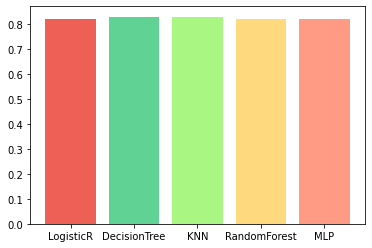

In [ ]:
plt.figure()
plt.bar(range(5),accuracy, align='center',color=["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"])
ax = plt.axes()
ax.set_xticks(range(5))
ax.set_xticklabels(modelo)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


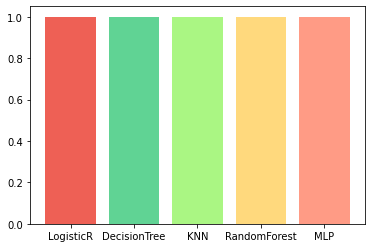

In [ ]:
plt.figure()
plt.bar(range(5),recall, align='center',color=["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"])
ax = plt.axes()
ax.set_xticks(range(5))
ax.set_xticklabels(modelo)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


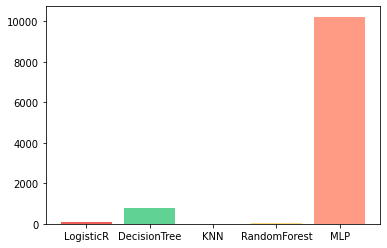

In [ ]:
plt.figure()
plt.bar(range(5),tiempo, align='center',color=["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"])
ax = plt.axes()
ax.set_xticks(range(5))
ax.set_xticklabels(modelo)
plt.show()